In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn.metrics import roc_auc_score as auc
from sklearn.preprocessing import StandardScaler
import random
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

pd.set_option("display.max_rows", 1000)
pd.set_option('display.max_colwidth', None)
sns.set(rc={'figure.figsize':(15,10),
            'figure.dpi':200})

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
data = pd.read_csv('/content/gdrive/Shareddrives/BAX - 452/fifa20.csv')

In [4]:
print(data['team_position'].value_counts())
print(data['team_position'].isna().sum())

SUB    7820
RES    2958
GK      662
RCB     660
LCB     660
RB      560
LB      560
ST      458
RCM     411
LCM     411
RM      399
LM      398
CAM     311
RDM     244
LDM     242
RS      195
LS      195
CDM     181
LW      162
RW      161
CB      100
CM       76
RWB      58
LWB      58
RAM      23
LAM      23
RF       19
LF       19
CF       14
Name: team_position, dtype: int64
240


## Data Preprocessing

In [5]:
for i in range(len(data['team_position'])):
  if data['team_position'][i] in ["SUB", "RES"] or data['team_position'][i] is np.NaN:
    data['team_position'][i] = data['player_positions'][i].split(",")[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
data['team_position'].value_counts()

ST     2121
GK     2036
CB     1825
CM     1386
LB     1306
RB     1285
LM     1074
RM     1058
CAM    1006
CDM     991
RCB     660
LCB     660
LW      421
LCM     411
RCM     411
RW      395
RDM     244
LDM     242
RS      195
LS      195
LWB     101
RWB      89
CF       82
RAM      23
LAM      23
RF       19
LF       19
Name: team_position, dtype: int64

In [7]:
data.loc[data['team_position'].isin(["LDM", "CDM", "RDM"]), 'team_position'] = "DM"
data.loc[data['team_position'].isin(["LCM", "RCM"]), 'team_position'] = "CM"
data.loc[data['team_position'].isin(["LAM", "RAM", "CAM"]), 'team_position'] = "AM"
data.loc[data['team_position'].isin(["LCB", "RCB"]), 'team_position'] = "CB"
data.loc[data['team_position'].isin(["LS", "RS", "CF"]), 'team_position'] = "ST"
data.loc[data['team_position'].isin(["LF", "LM"]), 'team_position'] = "LW"
data.loc[data['team_position'].isin(["RF", "RM"]), 'team_position'] = "RW"
data.loc[data['team_position'] == "LWB", 'team_position'] = "LB"
data.loc[data['team_position'] == "RWB", 'team_position'] = "RB"

In [8]:
data['team_position'].value_counts()

CB    3145
ST    2593
CM    2208
GK    2036
LW    1514
DM    1477
RW    1472
LB    1407
RB    1374
AM    1052
Name: team_position, dtype: int64

In [9]:
data['team_position'].isna().sum()

0

In [10]:
data.loc[data['preferred_foot'] == "Left", 'preferred_foot'] = 0
data.loc[data['preferred_foot'] == "Right", 'preferred_foot'] = 1

In [11]:
data.isna().sum()

sofifa_id                         0
player_url                        0
short_name                        0
long_name                         0
age                               0
dob                               0
height_cm                         0
weight_kg                         0
nationality                       0
club                              0
overall                           0
potential                         0
value_eur                         0
wage_eur                          0
player_positions                  0
preferred_foot                    0
international_reputation          0
weak_foot                         0
skill_moves                       0
work_rate                         0
body_type                         0
real_face                         0
release_clause_eur             1298
player_tags                   16779
team_position                     0
team_jersey_number              240
loaned_from                   17230
joined                      

In [12]:
x_rows = data['team_position'] != "GK"
x_columns = ['height_cm', 'weight_kg', 'preferred_foot', 'weak_foot', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 
             'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
             'skill_curve', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
             'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
             'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure',
             'defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle']
x = data.loc[x_rows, x_columns]
y = data.loc[x_rows, 'team_position']

In [13]:
x.isna().sum()

height_cm                     0
weight_kg                     0
preferred_foot                0
weak_foot                     0
pace                          0
shooting                      0
passing                       0
dribbling                     0
defending                     0
physic                        0
attacking_crossing            0
attacking_finishing           0
attacking_heading_accuracy    0
attacking_short_passing       0
attacking_volleys             0
skill_dribbling               0
skill_curve                   0
skill_long_passing            0
skill_ball_control            0
movement_acceleration         0
movement_sprint_speed         0
movement_agility              0
movement_reactions            0
movement_balance              0
power_shot_power              0
power_jumping                 0
power_stamina                 0
power_strength                0
power_long_shots              0
mentality_aggression          0
mentality_interceptions       0
mentalit

## Splitting & Standardizing Data

#### Converting positions to label encodings

In [14]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

y_label = encoder.fit_transform(y)

In [16]:
x_train, x_test, y_train, y_test = tts(x, y_label, test_size=0.2, random_state=42)

In [17]:
scaler = StandardScaler()

x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train), columns = x_train.columns)
x_test_scaled = pd.DataFrame(scaler.transform(x_test), columns = x_test.columns)

## Multinomial Classifier

In [18]:
# evaluate multinomial logistic regression model
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegressionCV

# define the multinomial logistic regression model
model = LogisticRegressionCV(multi_class='multinomial', solver='lbfgs', max_iter=1000)

In [19]:
# fit the model
model.fit(x_train_scaled, y_train)

LogisticRegressionCV(max_iter=1000, multi_class='multinomial')

In [20]:
# finding variable importance
print(model.coef_.shape)
coefs = np.exp(model.coef_)

(9, 38)


In [21]:
VarImp = pd.DataFrame(coefs, encoder.classes_, columns = x_train.columns)

In [22]:
nlargest = 5
order = np.argsort(-VarImp.values, axis=1)[:, :nlargest]
TopVars = pd.DataFrame(VarImp.columns[order], 
                      columns=['TopVar{}'.format(i) for i in range(1, nlargest+1)],
                      index=VarImp.index)

TopVars

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,TopVar1,TopVar2,TopVar3,TopVar4,TopVar5
AM,mentality_vision,passing,power_long_shots,attacking_short_passing,skill_ball_control
CB,defending_marking,defending,attacking_heading_accuracy,mentality_interceptions,height_cm
CM,skill_long_passing,mentality_vision,attacking_short_passing,skill_ball_control,power_stamina
DM,mentality_interceptions,skill_long_passing,defending_standing_tackle,attacking_short_passing,defending
LB,attacking_crossing,defending_sliding_tackle,defending,defending_standing_tackle,movement_sprint_speed
LW,attacking_crossing,skill_dribbling,mentality_positioning,attacking_finishing,dribbling
RB,attacking_crossing,preferred_foot,defending_sliding_tackle,defending,defending_standing_tackle
RW,attacking_crossing,mentality_positioning,dribbling,movement_sprint_speed,skill_dribbling
ST,attacking_finishing,mentality_positioning,shooting,attacking_volleys,attacking_short_passing


In [23]:
# Computing predictions for test data
y_hat = model.predict(x_test_scaled)

In [25]:
def evaluate_rf(test, pred):

    print(f"The overall Accuracy of Mutlinomial Logistic Regression is {round(accuracy_score(test, pred)*100,2)}")
    print(f"The weighted Precision of Mutlinomial Logistic Regression is {round(precision_score(test, pred, average='weighted')*100,2)}")
    print(f"The weighted Recall of Mutlinomial Logistic Regression is {round(recall_score(test, pred, average='weighted')*100,2)}")
    print(f"The weighted F-1 score of Mutlinomial Logistic Regression is {round(f1_score(y_test, pred, average='weighted')*100,2)}")

In [26]:
evaluate_rf(y_test, y_hat)

The overall Accuracy of Mutlinomial Logistic Regression is 69.93
The weighted Precision of Mutlinomial Logistic Regression is 69.16
The weighted Recall of Mutlinomial Logistic Regression is 69.93
The weighted F-1 score of Mutlinomial Logistic Regression is 69.21


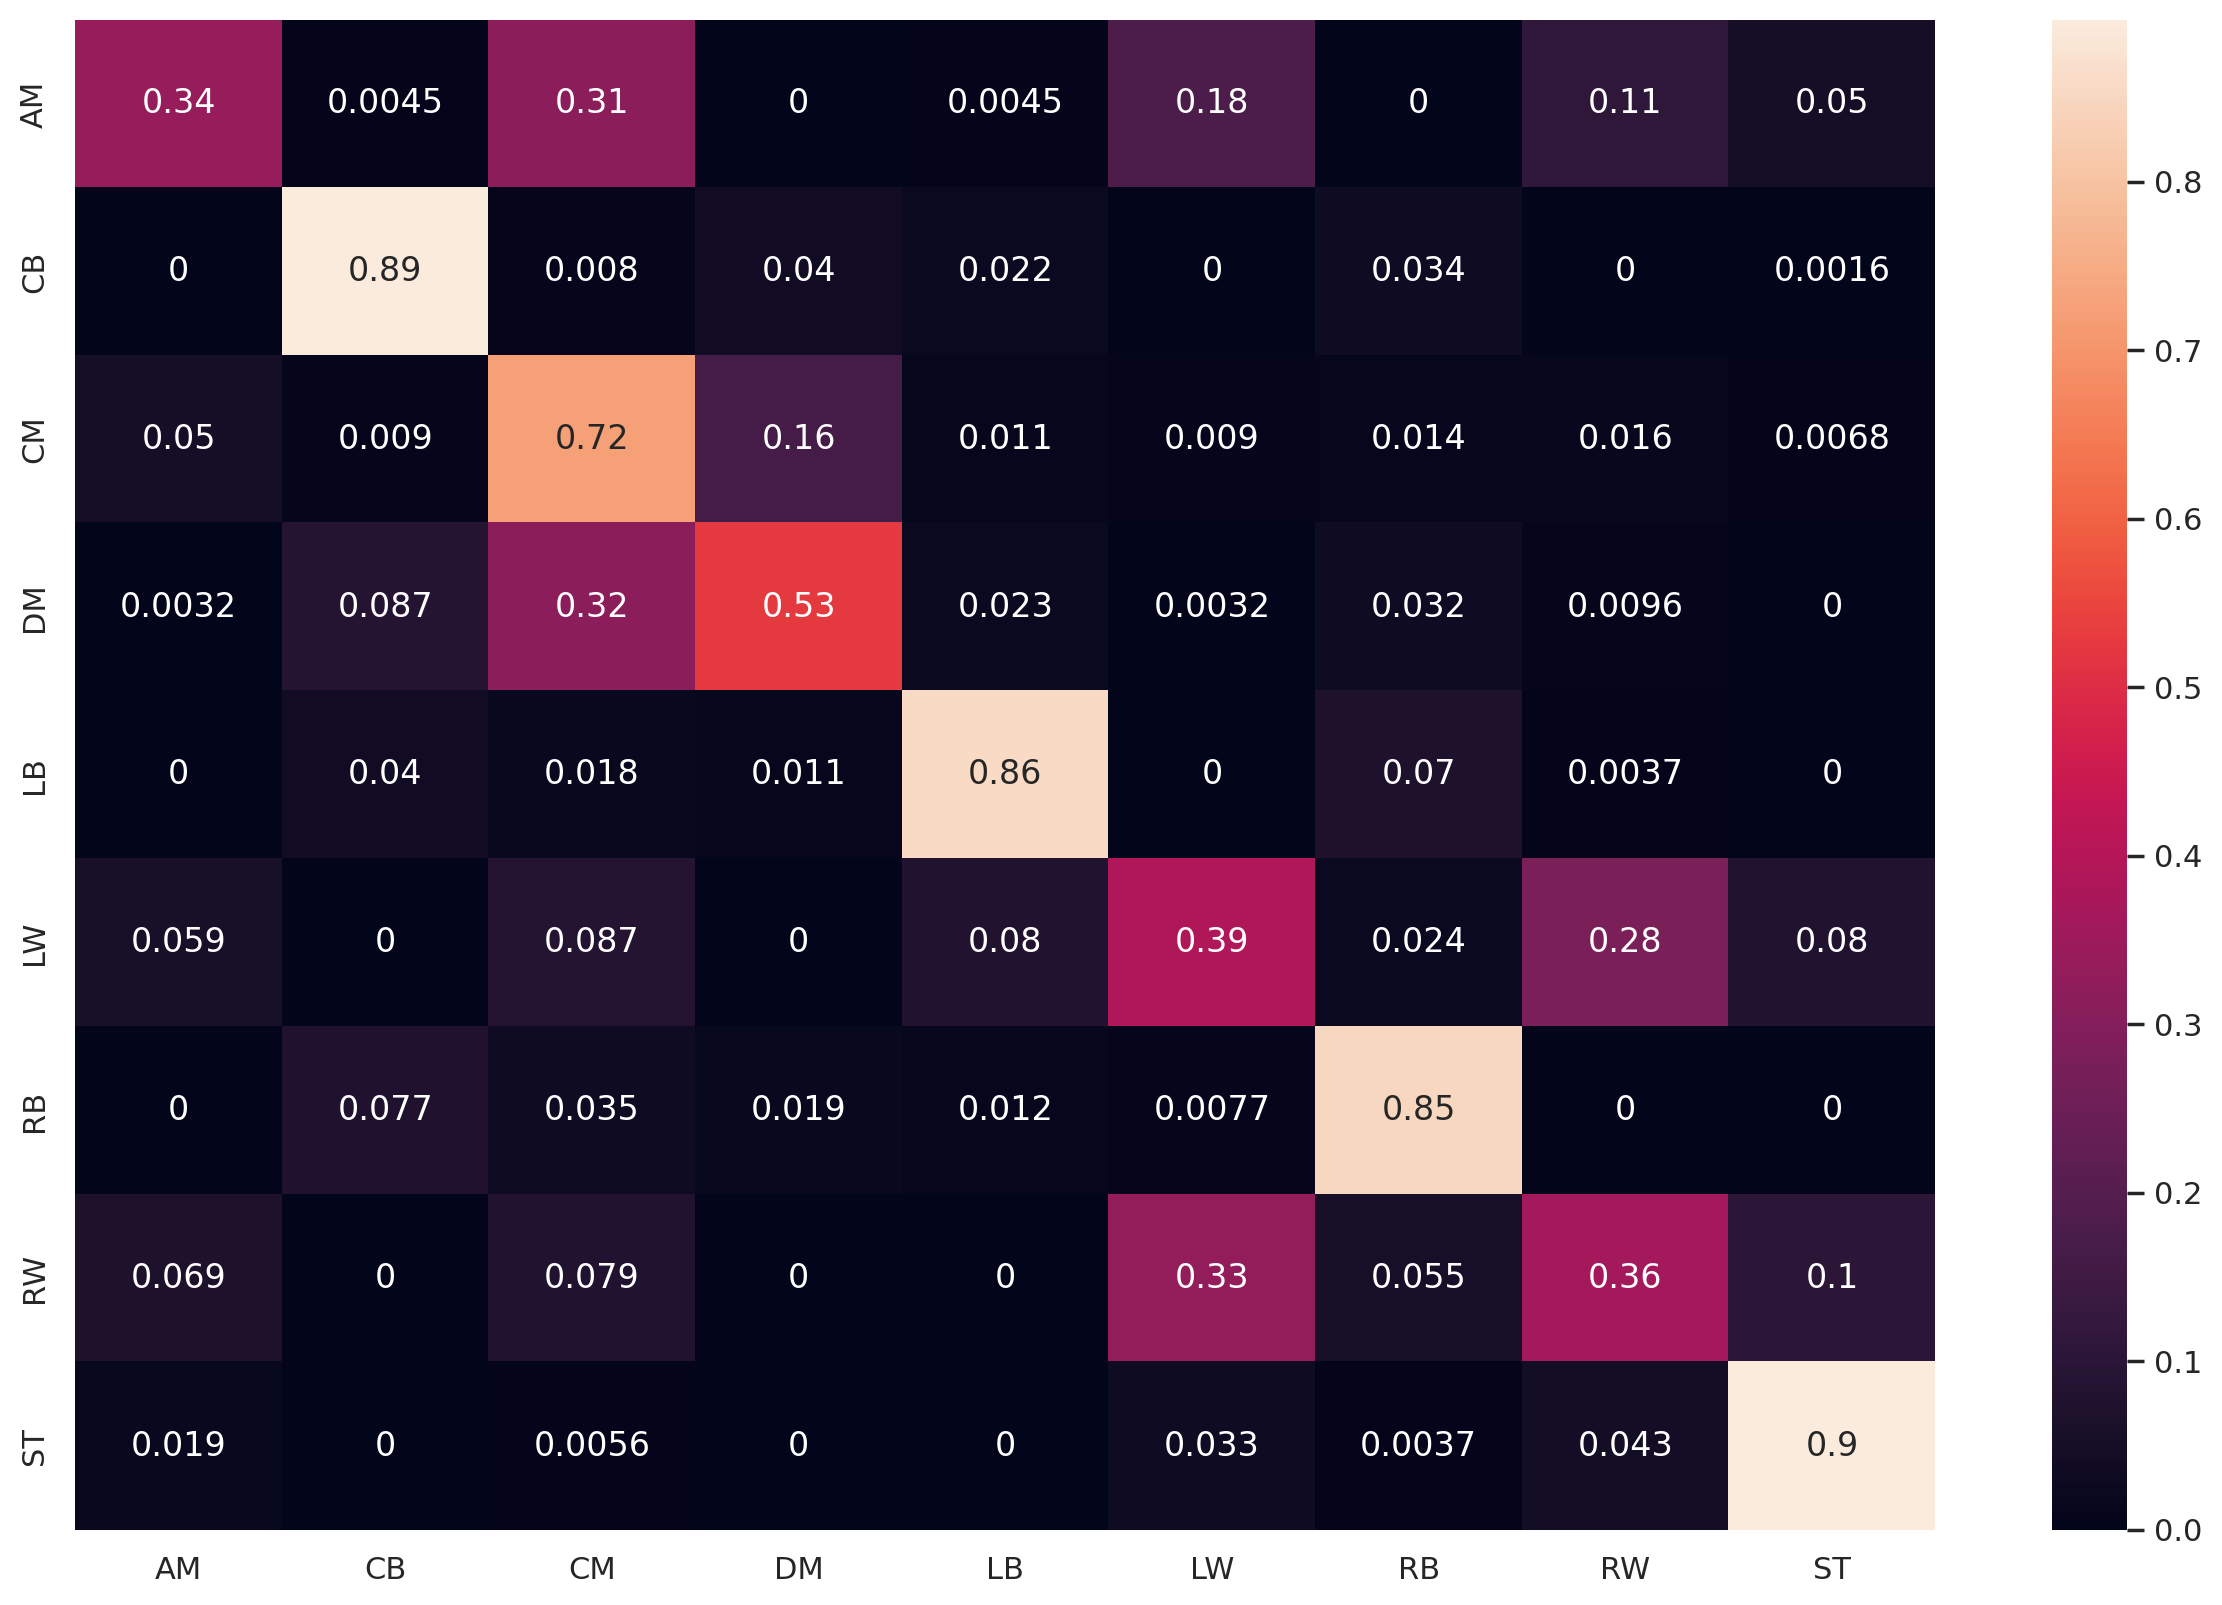

In [28]:
# creating a confusion matrix
map = confusion_matrix(encoder.inverse_transform(y_test), encoder.inverse_transform(y_hat))
map_pct = map/map.sum(axis=1)[:,None]
sns.heatmap(map_pct, annot=True, xticklabels=encoder.classes_, yticklabels=encoder.classes_)

## Random Forest Classifier

In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV

In [30]:
rfc = RandomForestClassifier(n_estimators=1000, 
                             n_jobs = -1,
                             random_state = 42)

rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

#### Evaluation Metrics

In [31]:
evaluate_rf(y_test, y_pred)

The overall Accuracy of Mutlinomial Logistic Regression is 68.45
The weighted Precision of Mutlinomial Logistic Regression is 67.29
The weighted Recall of Mutlinomial Logistic Regression is 68.45
The weighted F-1 score of Mutlinomial Logistic Regression is 67.37


#### Confusion Matrix

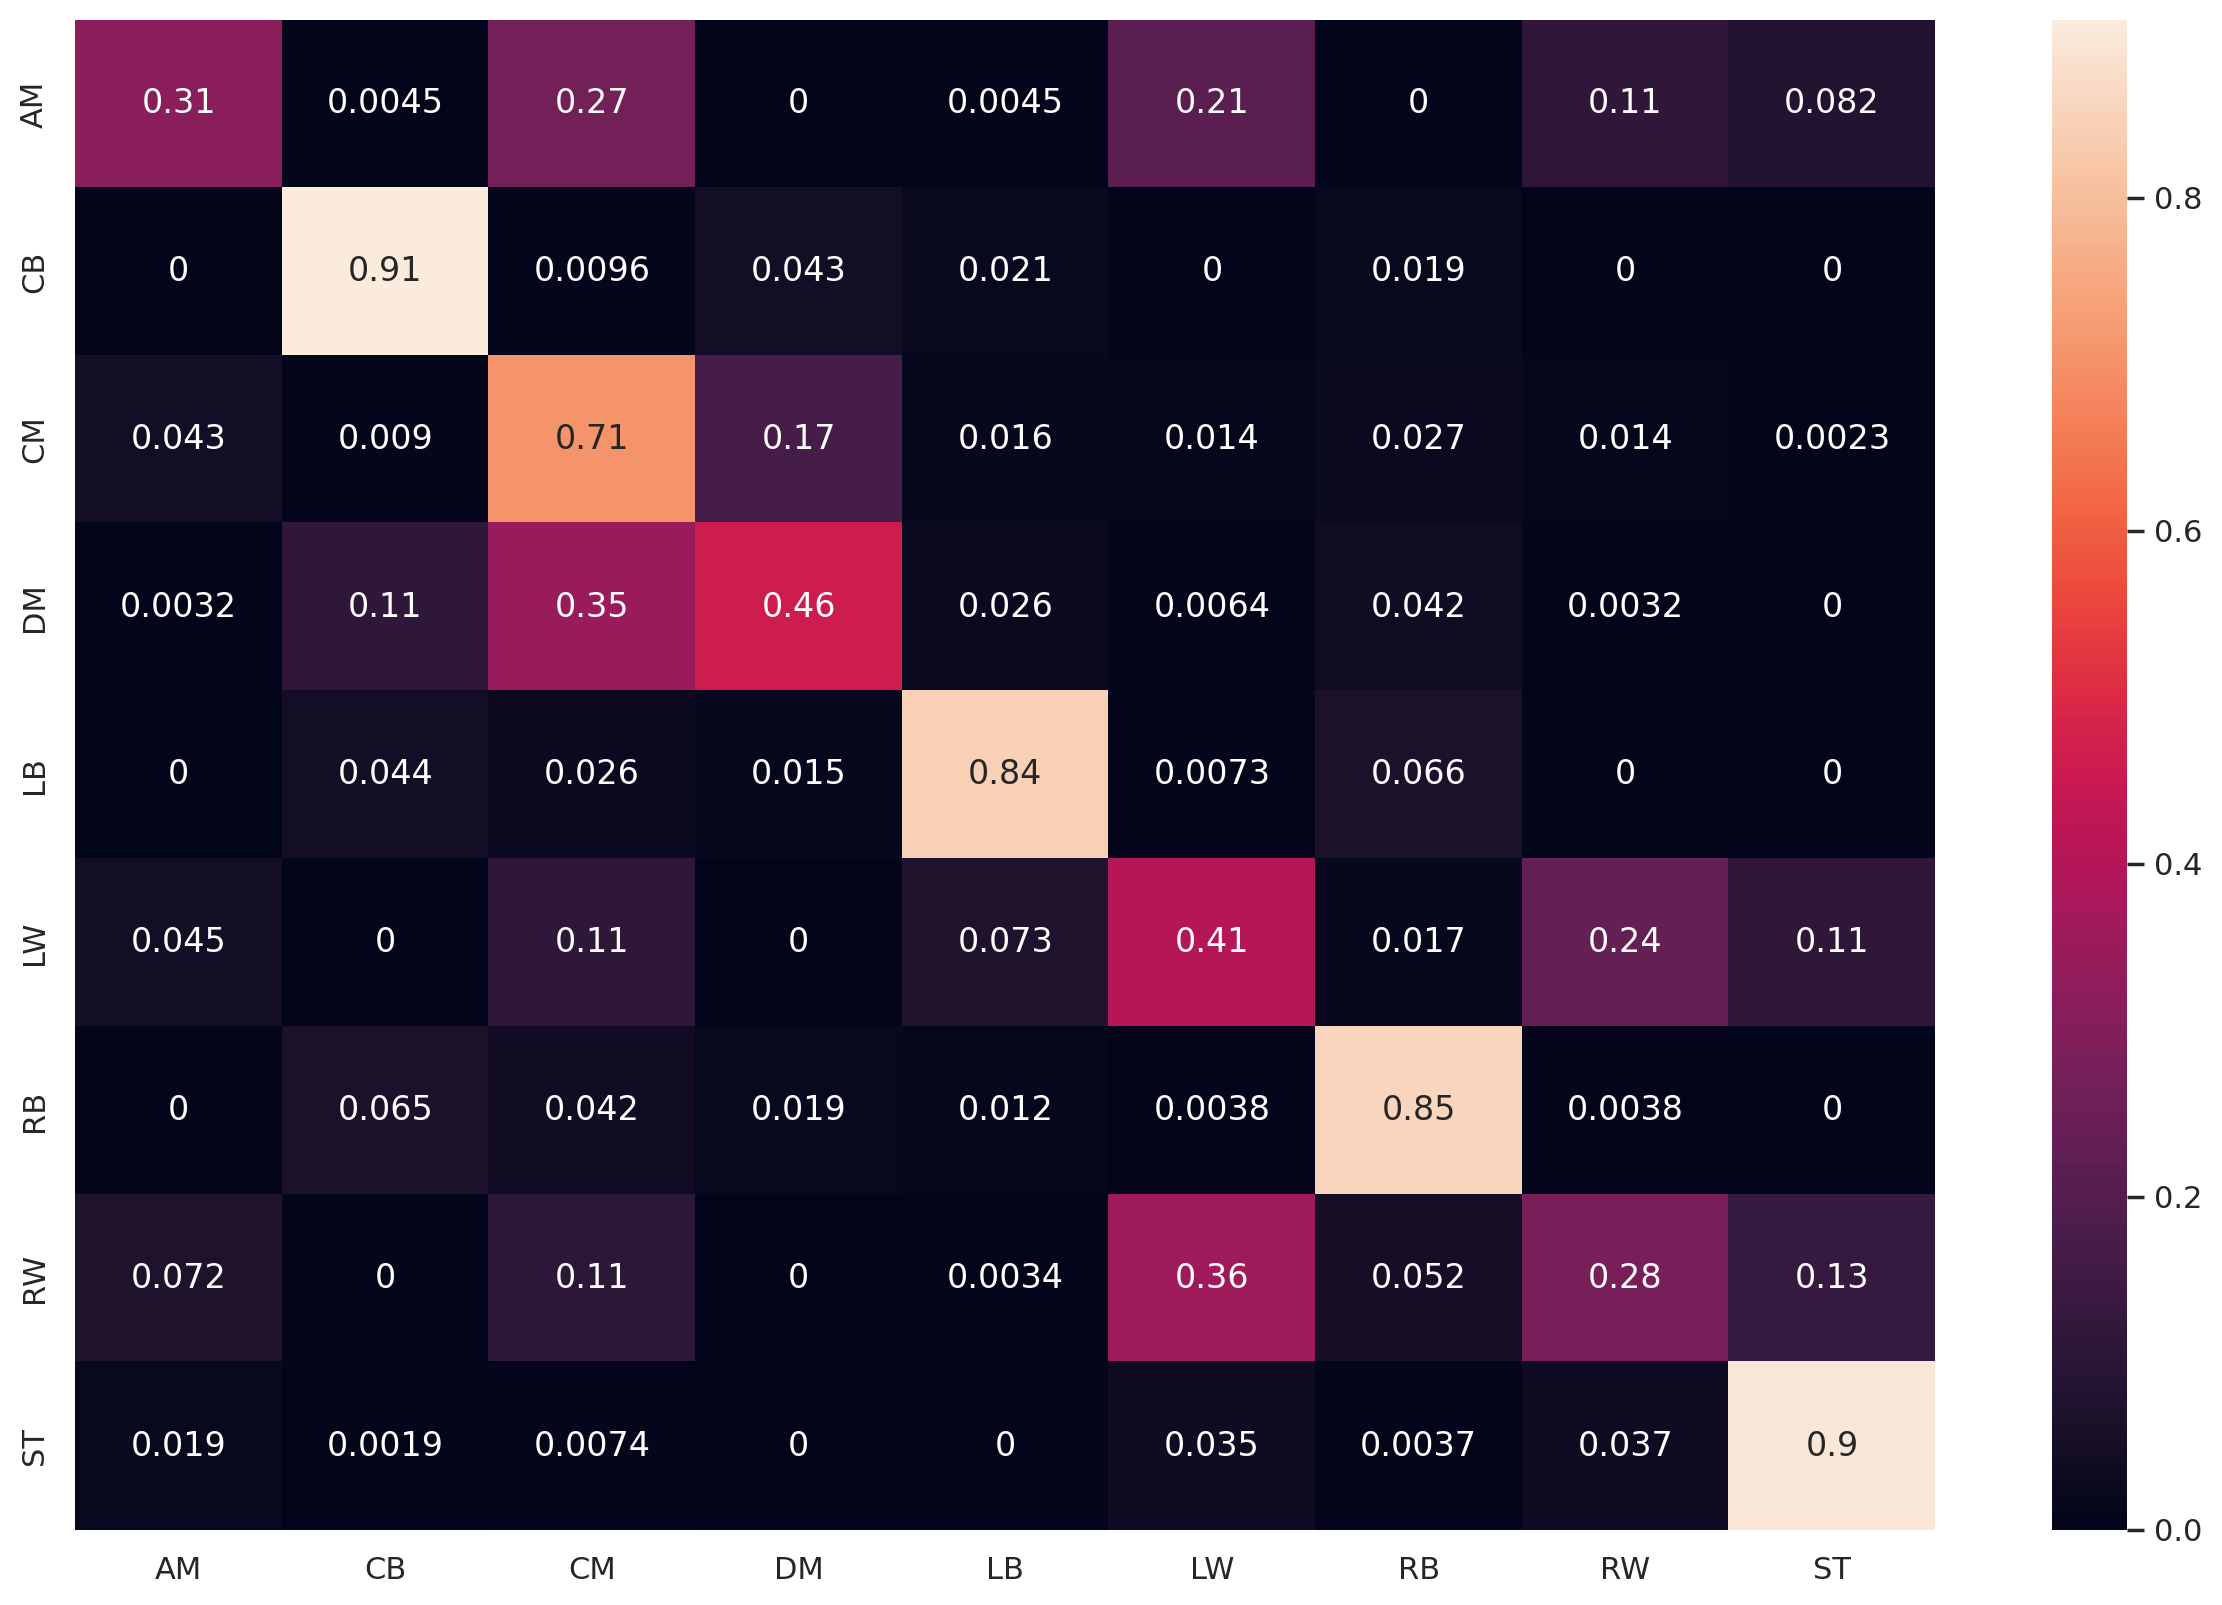

In [32]:
map = confusion_matrix(encoder.inverse_transform(y_test), encoder.inverse_transform(y_pred))
map_pct = map/map.sum(axis=1)[:,None]
sns.heatmap(map_pct, annot=True, xticklabels = encoder.classes_, yticklabels = encoder.classes_)

#### 5-fold Cross Validation

In [33]:
rfc_cv_score = cross_validate(rfc, x_train, y_train, cv=5, scoring=['f1_weighted','precision_weighted','recall_weighted','accuracy'])

In [34]:
print(f"The cross-validated Accuracy of Random Forest is {round(rfc_cv_score['test_accuracy'].mean()*100,2)}")
print(f"The weighted Precision of Random Forest is {round(rfc_cv_score['test_precision_weighted'].mean()*100,2)}")
print(f"The weighted Recall of Random Forest is {round(rfc_cv_score['test_recall_weighted'].mean()*100,2)}")
print(f"The weighted F-1 score of Random Forest is {round(rfc_cv_score['test_f1_weighted'].mean()*100,2)}")

The cross-validated Accuracy of Random Forest is 69.13
The weighted Precision of Random Forest is 67.83
The weighted Recall of Random Forest is 69.13
The weighted F-1 score of Random Forest is 68.09


#### Feature Importance

In [35]:
imp_dict = {}
for key, val in zip(x_train.columns, np.array(rfc.feature_importances_)*100/np.max(np.array(rfc.feature_importances_))):
    imp_dict[key] = round(val,2)

imp_df = pd.DataFrame(imp_dict, index = [0]).T.reset_index().rename(columns = {'index':'Column',0:'Importance'})
imp_df['Importance'] = imp_df['Importance'].astype('float64')
top_10 = imp_df.sort_values(by = 'Importance', ascending = False).head(10)

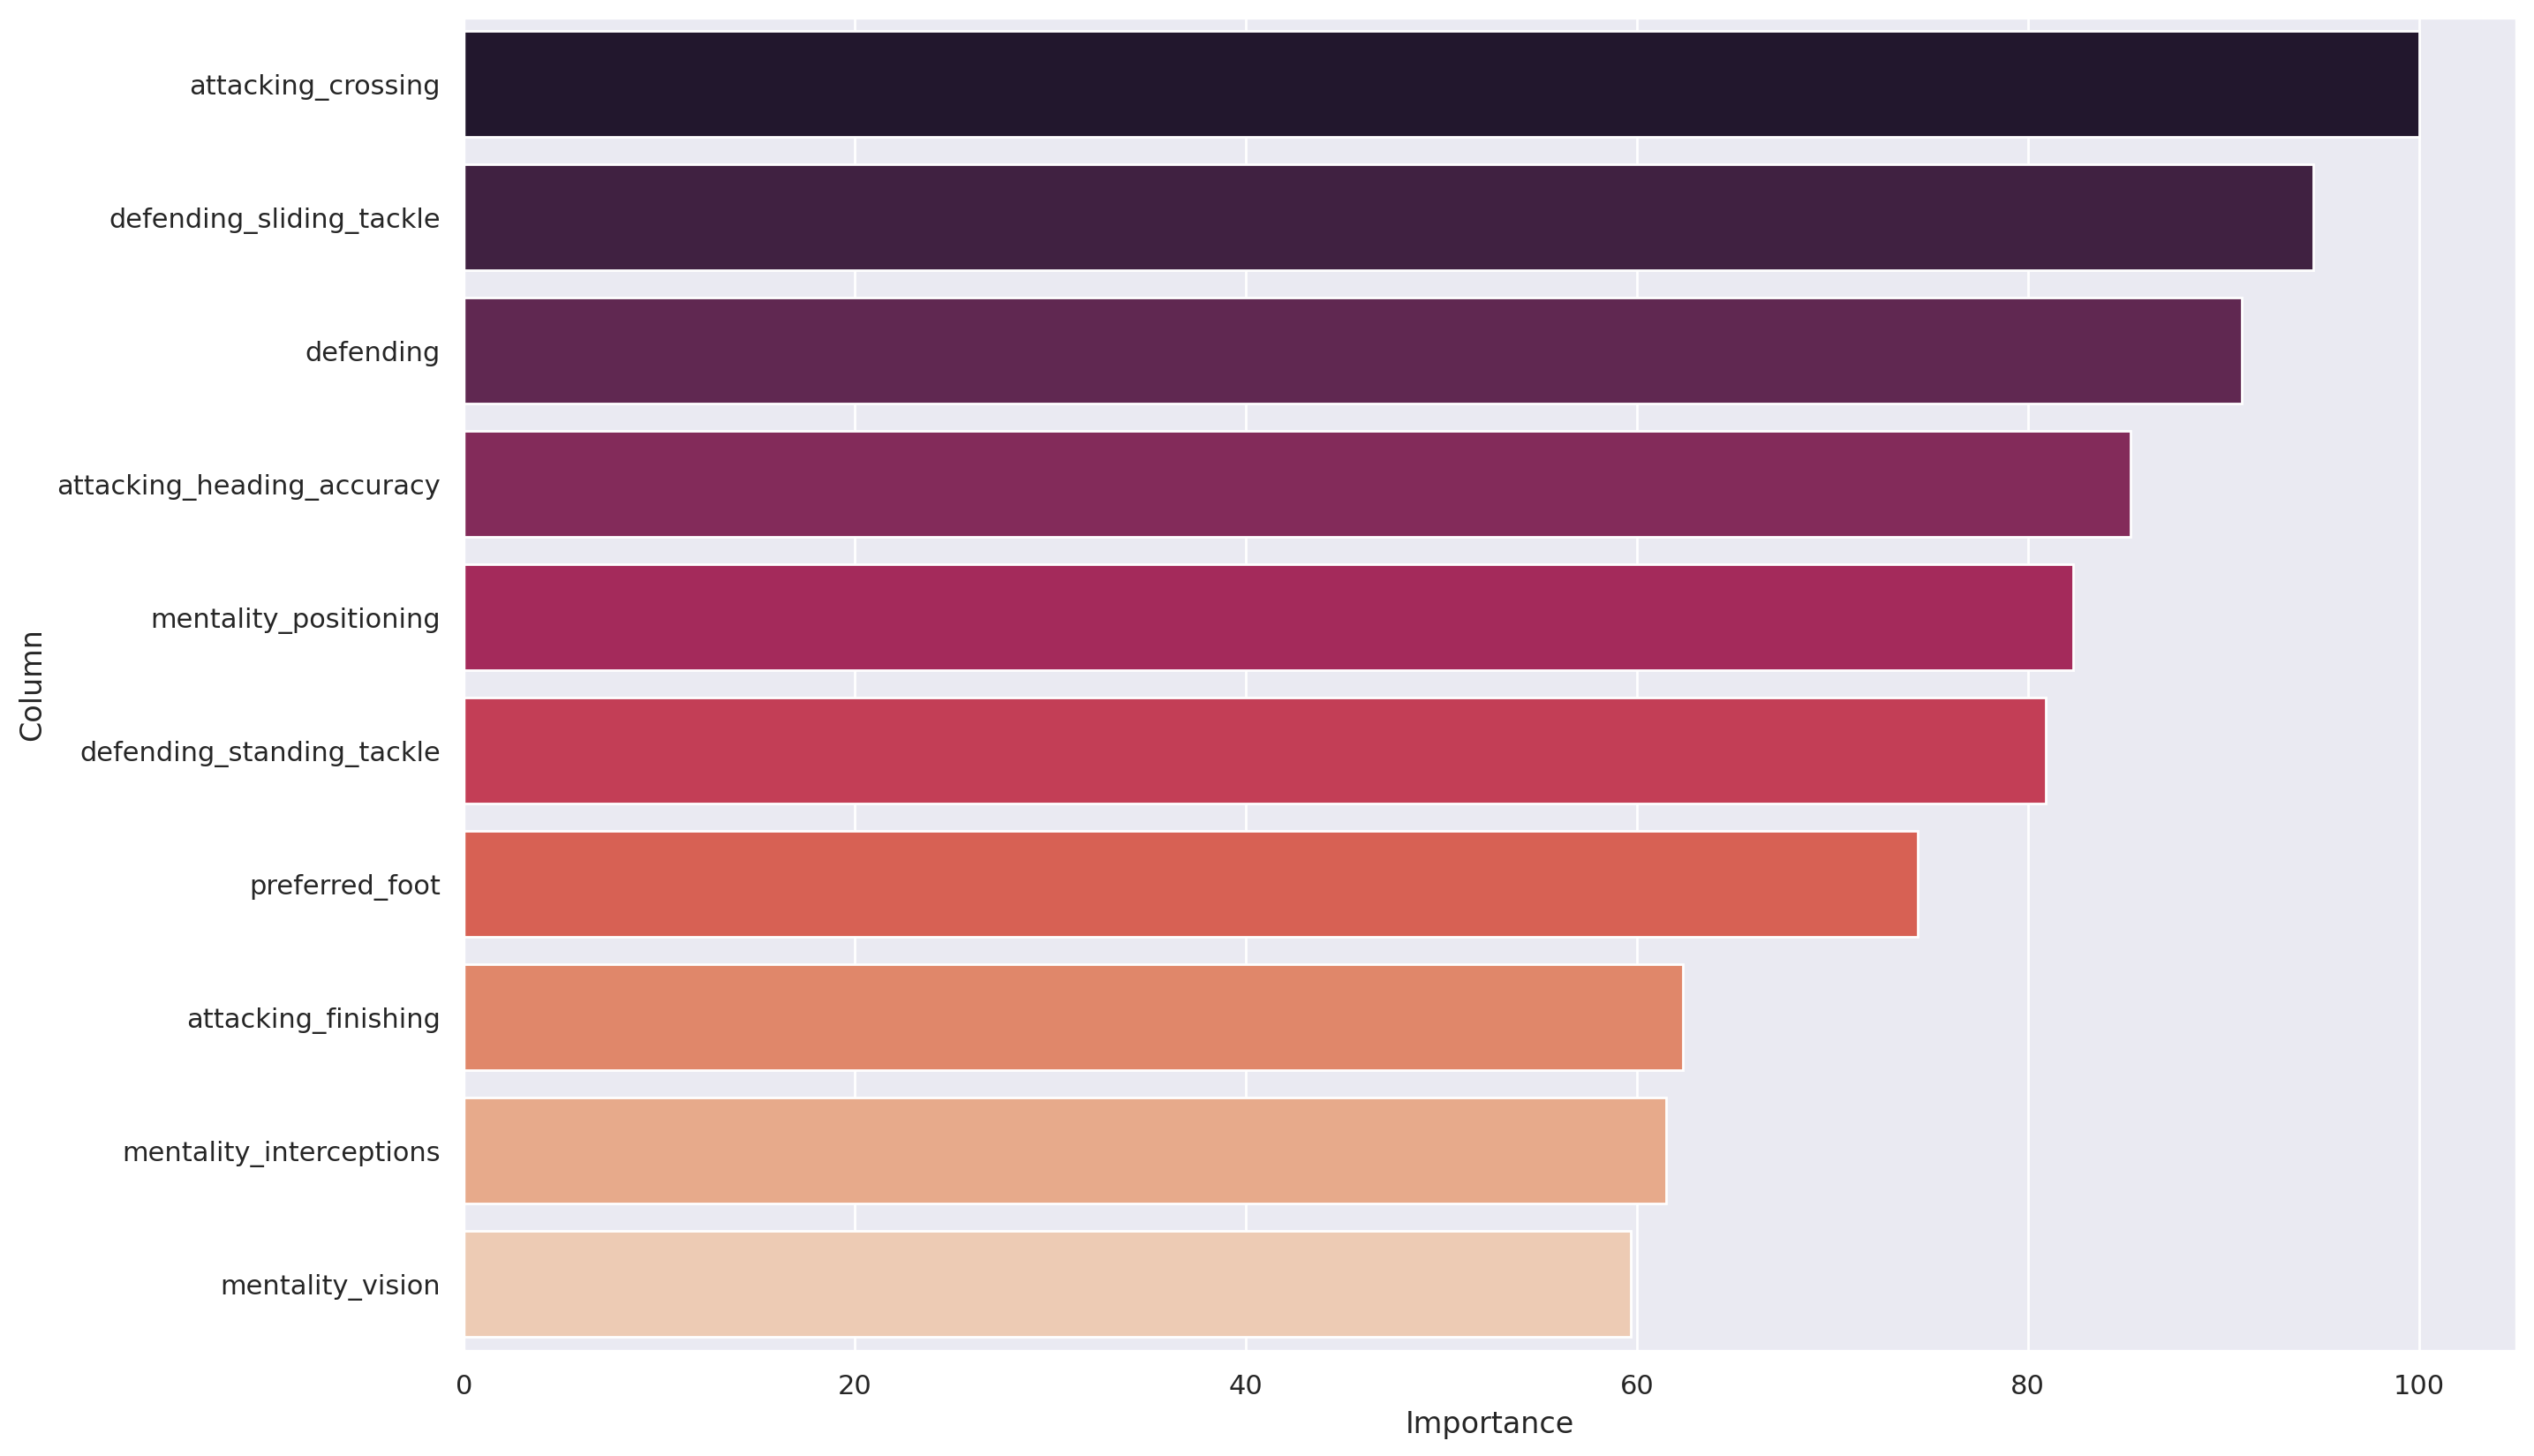

In [36]:
sns.barplot(data = top_10, x = 'Importance', y = 'Column', palette="rocket")

### Fine-Tuning the hyperparameters

In [37]:
n_estimators = [250, 500, 750, 1000, 1250, 1500, 1750, 2000]
max_features = ['sqrt',0.1,0.15,0.2,0.25,0.3,0.4,0.5]
max_depth = [int(x) for x in np.linspace(50, 200, num = 25)]
max_depth.append(None)

In [38]:
random_grid = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 'max_depth': max_depth    
 }

In [ ]:
rfc = RandomForestClassifier()
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=1, random_state=42, n_jobs = -1)

In [ ]:
rfc_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [50, 56, 62, 68, 75, 81,
                                                      87, 93, 100, 106, 112,
                                                      118, 125, 131, 137, 143,
                                                      150, 156, 162, 168, 175,
                                                      181, 187, 193, 200,
                                                      None],
                                        'max_features': ['sqrt', 0.1, 0.15, 0.2,
                                                         0.25, 0.3, 0.4, 0.5],
                                        'n_estimators': [250, 500, 750, 1000,
                                                         1250, 1500, 1750,
                                                         2000]},
                   random_state=42, verbose=1)

In [ ]:
print(rfc_random.best_params_)

{'n_estimators': 1750, 'max_features': 'sqrt', 'max_depth': 56}


In [ ]:
rfc = RandomForestClassifier(n_estimators= 1750,
                             max_features = 'sqrt',
                             max_depth = 56,
                             random_state = 42,
                             n_jobs = -1)
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

#### Evaluation Metrics

In [ ]:
evaluate_rf(y_test, y_pred)

The overall Accuracy of Random Forest is 69.01
The weighted Precision of Random Forest is 67.9
The weighted Recall of Random Forest is 69.01
The weighted F-1 score of Random Forest is 67.91


#### Confusion Matrix

In [ ]:
map = confusion_matrix(encoder.inverse_transform(y_test), encoder.inverse_transform(y_pred))
map_pct = map/map.sum(axis=1)[:,None]
sns.heatmap(map_pct, annot=True, xticklabels = encoder.classes_, yticklabels = encoder.classes_)

#### 5-fold Cross Validation

In [ ]:
rfc_cv_score = cross_validate(rfc, x_train, y_train, cv=5, scoring=['f1_weighted','precision_weighted','recall_weighted','accuracy'])

In [ ]:
print(f"The cross-validated Accuracy of Random Forest is {round(rfc_cv_score['test_accuracy'].mean()*100,2)}")
print(f"The weighted Precision of Random Forest is {round(rfc_cv_score['test_precision_weighted'].mean()*100,2)}")
print(f"The weighted Recall of Random Forest is {round(rfc_cv_score['test_recall_weighted'].mean()*100,2)}")
print(f"The weighted F-1 score of Random Forest is {round(rfc_cv_score['test_f1_weighted'].mean()*100,2)}")

The cross-validated Accuracy of Random Forest is 69.2
The weighted Precision of Random Forest is 67.88
The weighted Recall of Random Forest is 69.2
The weighted F-1 score of Random Forest is 68.16


#### Feature Importance

In [ ]:
imp_dict = {}
for key, val in zip(x_train.columns, np.array(rfc.feature_importances_)*100/np.max(np.array(rfc.feature_importances_))):
    imp_dict[key] = round(val,2)

imp_df = pd.DataFrame(imp_dict, index = [0]).T.reset_index().rename(columns = {'index':'Column',0:'Importance'})
imp_df['Importance'] = imp_df['Importance'].astype('float64')
top_10 = imp_df.sort_values(by = 'Importance', ascending = False).head(10)

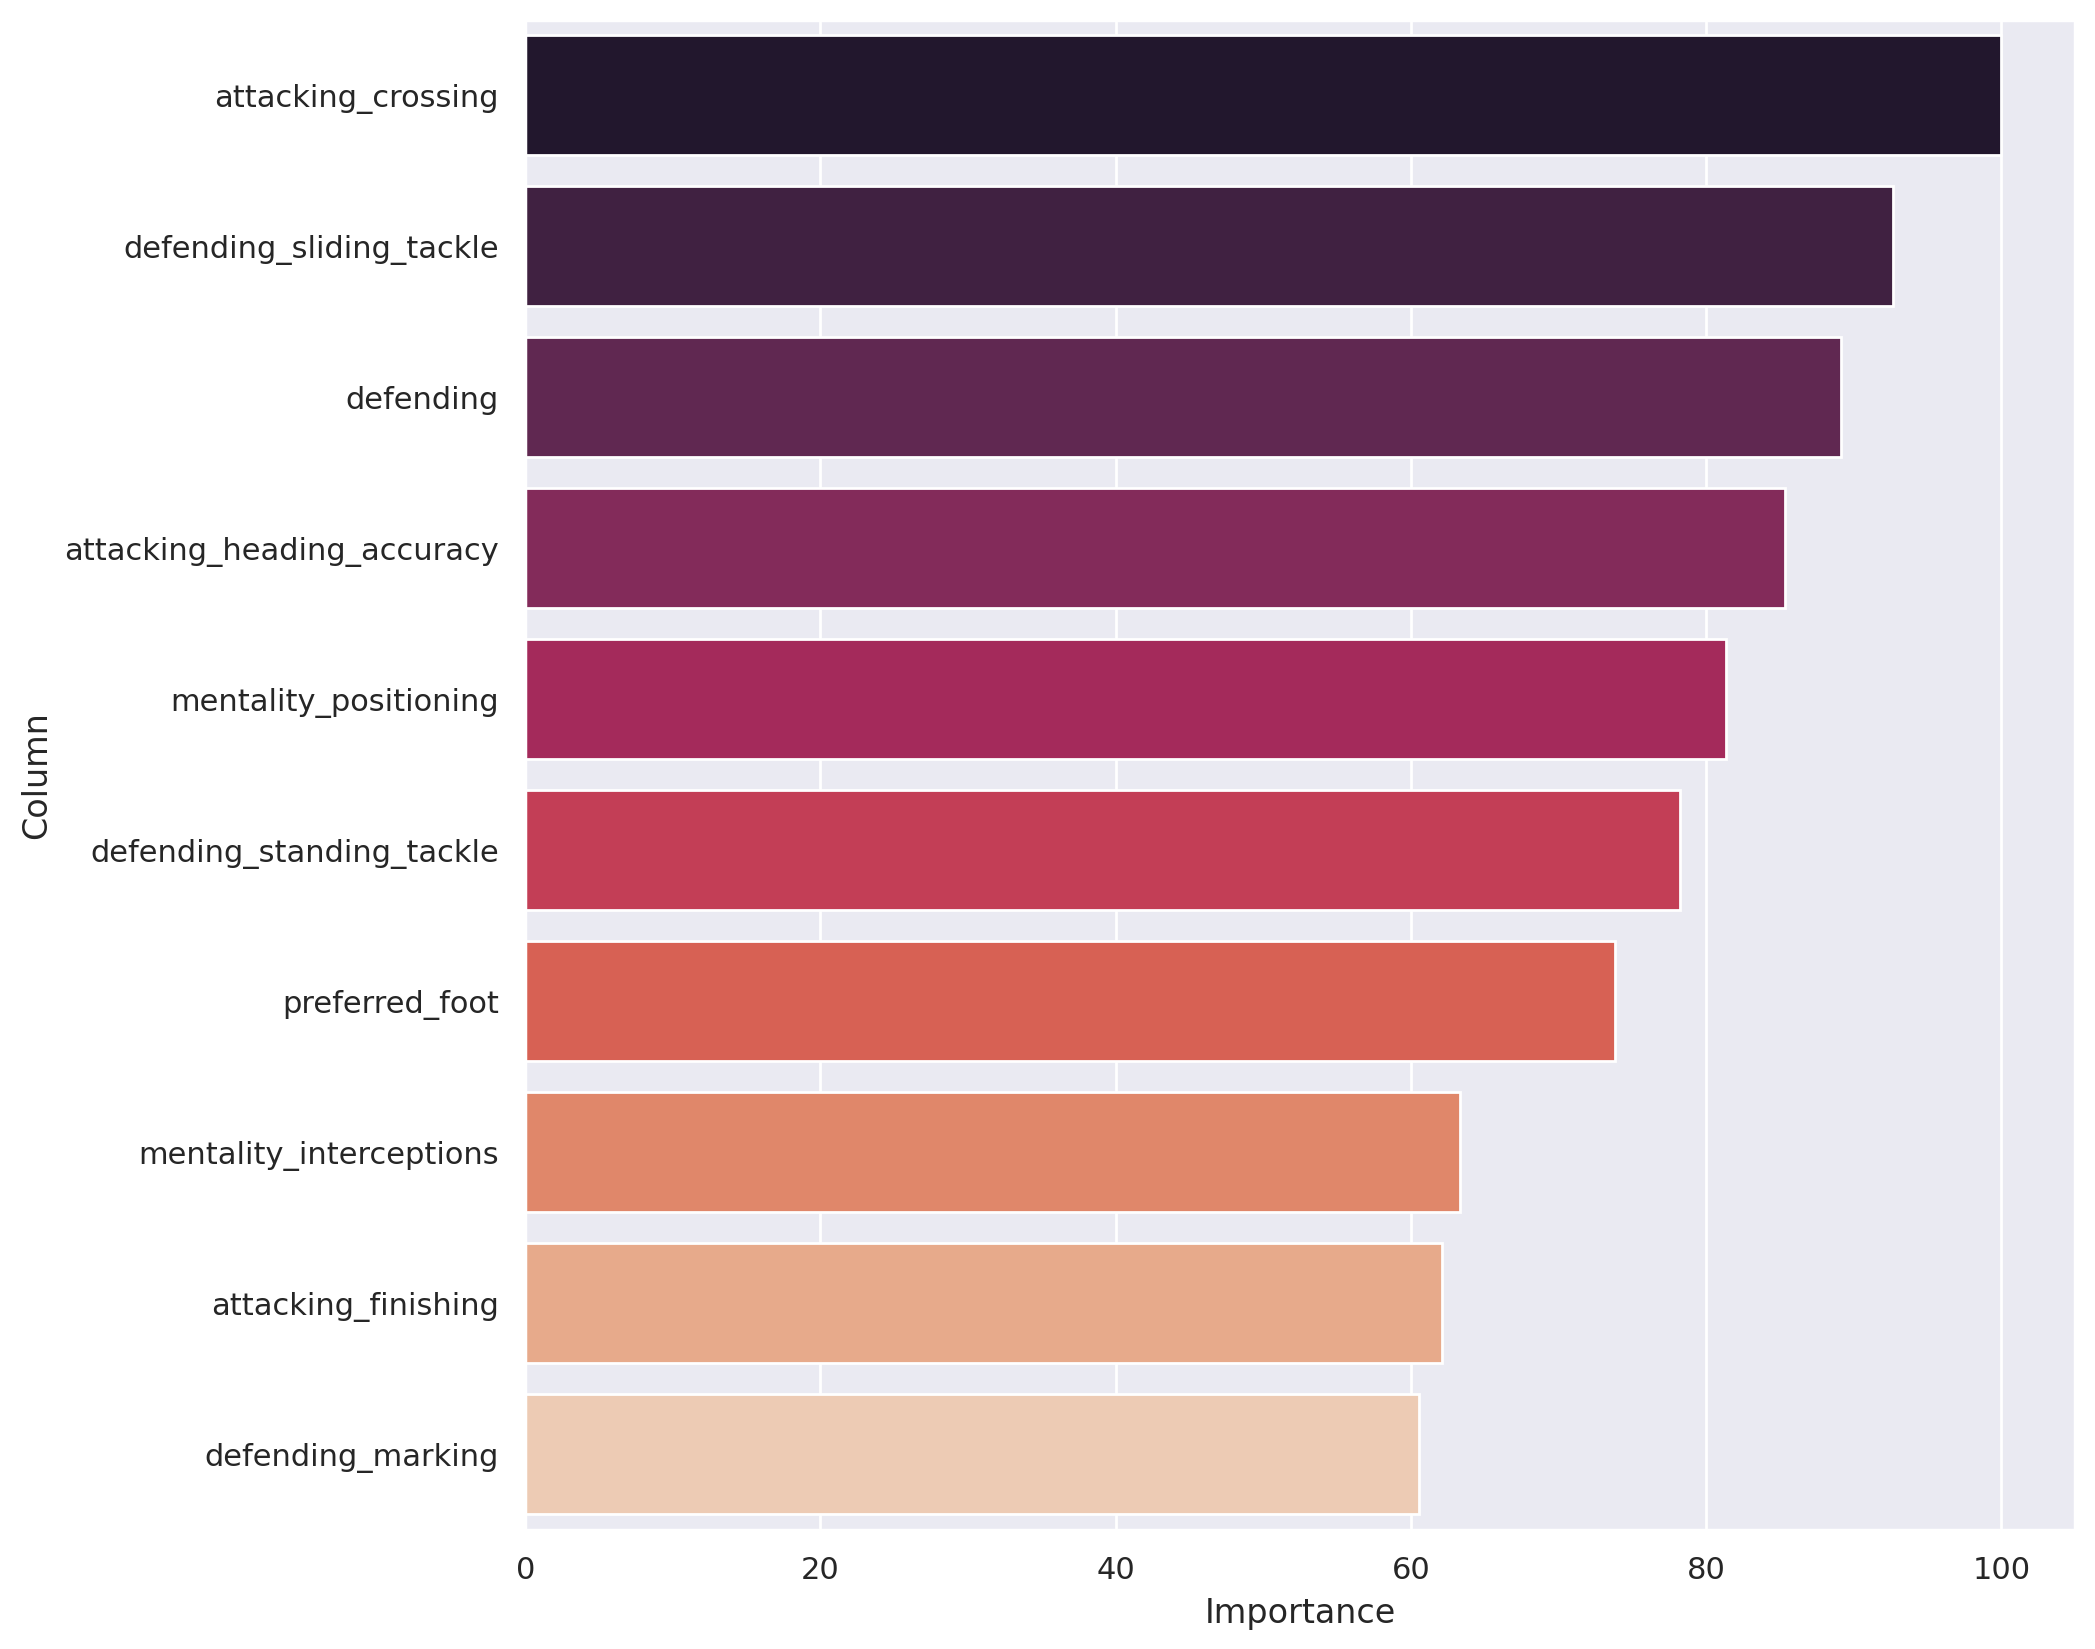

In [ ]:
sns.barplot(data = top_10, x = 'Importance', y = 'Column', palette="rocket")